# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos A. Iglesias

## [Introduction to Machine Learning II](3_0_0_Intro_ML_2.ipynb)

# Exercise 2 - The Titanic Dataset

In this exercise we are going to put in practice what we have learnt in the notebooks of the session. 

In the previous notebook we have been applying the SVM machine learning algorithm.

Your task is to apply other machine learning algorithms (at least 2) that you have seen in theory or others you are interested in.

You should compare the algorithms and describe your experiments.

|Variable | Description| Values| |-------------------------------| | survival| Survival| (0 = No; 1 = Yes)| |Pclass |Name | | |Sex |Sex | male, female| |Age |Age| |SibSp |Number of Siblings/Spouses Aboard|| |Parch |Number of Parents/Children Aboard|| |Ticket|Ticket Number|| |Fare |Passenger Fare|| |Cabin |Cabin|| |Embarked |Port of Embarkation| (C = Cherbourg; Q = Queenstown; S = Southampton)|

The definitions used for SibSp and Parch are:

Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

Parent: Mother or Father of Passenger Aboard Titanic

Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

#Imports 

In [49]:

# General import and load data
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

# Training and test spliting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree

# Estimators
from sklearn.svm import SVC

# Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Optimization
from sklearn.model_selection import GridSearchCV

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)


# if matplotlib is not set inline, you will not see plots
#alternatives auto gtk gtk2 inline osx qt qt5 wx tk
#%matplotlib auto
#%matplotlib qt
%matplotlib inline
#%run plot_learning_curve

In [50]:

url_test_titanic='https://raw.githubusercontent.com/AngelaBurgaleta/Entregas_93000822/main/ML2/data-titanic/test.csv'
url_train_titanic='https://raw.githubusercontent.com/AngelaBurgaleta/Entregas_93000822/main/ML2/data-titanic/train.csv'

df_train = pd.read_csv(url_train_titanic)
df_test = pd.read_csv(url_test_titanic)

##Explorando el dataset

In [51]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df_test.head(5)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
#me da igual explorar test que train
df_test.columns


Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked'],
      dtype='object')

In [54]:
print('Tamaño dataset train: ', df_train.shape)
print('Tamaño dataset test: ', df_test.shape)

Tamaño dataset train:  (891, 12)
Tamaño dataset test:  (418, 10)


In [55]:
#Voy a usar solo los datos de familiares abordo, tarifa, edad y sexo para predecir así que el resto de columnas no me interesan. 
df_train = df_train.drop(['Ticket', 'Name', 'Cabin', 'Embarked'], axis=1)


In [56]:
df_test = df_test.drop(['ticket', 'name', 'cabin', 'embarked'], axis=1)

In [57]:
df_train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [58]:
df_test.head(5)

,pclass,sex,age,sibsp,parch,fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [59]:
df_test['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [60]:
df_test['sibsp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: sibsp, dtype: int64

In [61]:
df_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [62]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [63]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [64]:
print('Mediana de edad: ', df_train['Age'].median())

Mediana de edad:  28.0


##Limpiando datos
Al final solo trabajaré con el dataset de train por comodidad. Hay que rellenar campos vacíos, codificar string (por ejemplo en el caso de sexo) y agrupar por grupos tanto de tarifa como de edad

In [66]:
#Rellenamos los campos vacios de edad con el dato de la mediana
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

#sexo chico=0 chica=1
df_train.loc[df_train["Sex"] == "male", "Sex"] = 0
df_train.loc[df_train["Sex"] == "female", "Sex"] = 1

#tarifa
#voy a dividir las tarifas en seis grupos, los precios mas bajos abundan mas por lo que he decidido hacer la división de la siguiente forma;
df_train.loc[ df_train['Fare'] <= 15, 'Fare'] = 0
df_train.loc[(df_train['Fare'] > 15) & (df_train['Fare'] <= 30), 'Fare'] = 1
df_train.loc[(df_train['Fare'] > 30) & (df_train['Fare'] <= 45), 'Fare'] = 2
df_train.loc[(df_train['Fare'] > 45) & (df_train['Fare'] <= 80), 'Fare'] = 3
df_train.loc[(df_train['Fare'] > 80) & (df_train['Fare'] <= 170), 'Fare'] = 4
df_train.loc[ df_train['Fare'] > 170, 'Fare'] = 5


#edad
#Voy a seleccionar cinco grupos de Edad (0, 15) (15, 30) (30, 45) (45, 65) (>65)
df_train.loc[ df_train['Age'] <= 15, 'Age'] = 0
df_train.loc[(df_train['Age'] > 15) & (df_train['Age'] <= 30), 'Age'] = 1
df_train.loc[(df_train['Age'] > 30) & (df_train['Age'] <= 45), 'Age'] = 2
df_train.loc[(df_train['Age'] > 45) & (df_train['Age'] <= 65), 'Age'] = 3
df_train.loc[ df_train['Age'] > 65, 'Age'] = 4




In [67]:
#Comprobamos que ya no quedan campos nulos
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [68]:
#A ver como ha quedado el dataset
df_train.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,1.0,1,0,0.0
1,2,1,1,1,2.0,1,0,3.0
2,3,1,3,1,1.0,0,0,0.0
3,4,1,1,1,2.0,1,0,3.0
4,5,0,3,0,2.0,0,0,0.0
5,6,0,3,0,1.0,0,0,0.0
6,7,0,1,0,3.0,0,0,3.0
7,8,0,3,0,0.0,3,1,1.0
8,9,1,3,1,1.0,0,2,0.0
9,10,1,2,1,0.0,1,0,2.0


##Visualización

En este apartado vamos a ver el número de supervivientes separados entre hombres y mujeres. Relacionando con familiares abordo, edad y tarifa

In [69]:
df_survived= df_train[df_train['Survived']==1]

df_survivedMale = df_survived[df_survived['Sex'] == 0]
df_survivedMale['Male'] = 1

df_survivedFemale = df_survived[df_survived['Sex'] == 1]
df_survivedFemale['Female'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [71]:
df_survivedMale = df_survivedMale.append(df_survivedFemale, ignore_index=True)

grouped_fare = df_survivedMale[['Female', 'Male', 'Fare']].groupby(['Fare'])

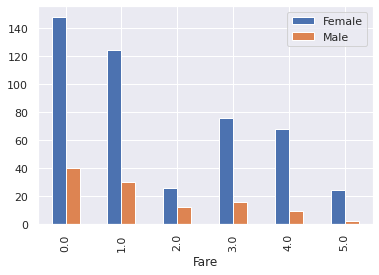

In [73]:
grouped_fare[['Female', 'Male']].count().plot.bar()

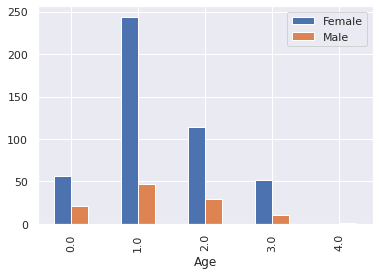

In [81]:
#Ninguna persona mayor de 65 ha sobrevivido y las mujeres entre 15 y 30 años son las que más tasa de supervivencia presentan
grouped_age=df_survivedMale[['Female', 'Male', 'Age']].groupby(['Age'])
grouped_age[['Female', 'Male']].count().plot.bar()


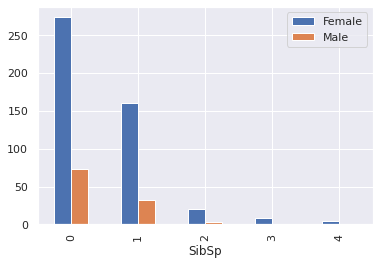

In [78]:
#Bastantes personas solas o con pocos familiares abordo han sobrevivdo 
grouped_SibSp=df_survivedMale[['Female', 'Male', 'SibSp']].groupby(['SibSp'])
grouped_SibSp[['Female', 'Male']].count().plot.bar()

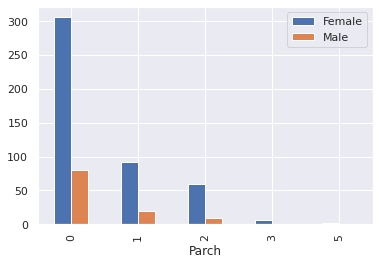

In [79]:
grouped_Parch=df_survivedMale[['Female', 'Male', 'Parch']].groupby(['Parch'])
grouped_Parch[['Female', 'Male']].count().plot.bar()

##Aplicar Modelo: Decision Tree

In [82]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [83]:
# Features of the model
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'PassengerId']
# Transform dataframe in numpy arrays. El campo que queremos predecir es si han sobrevivido, así que obviamente lo quitamos de features.
X = df_train[features].values
y = df_train['Survived'].values



# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

max_depth=3
random_state=1

# Create decision tree model
model_dt = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

In [85]:
model_dt.fit(X_train, y_train)

predicted_dt = model_dt.predict(X_test)
expected = y_test

In [86]:
# Accuracy
# Accuracy aceptable 
metrics.accuracy_score(expected, predicted_dt)

0.852017937219731

In [87]:
# Confusion matrix
#Solo tenemos 17 falsos muertos y 16 falsos vivos
print(metrics.confusion_matrix(expected, predicted_dt))

[[118  16]
 [ 17  72]]


In [88]:
# Report
# métricas que no están mal
print(classification_report(expected, predicted_dt))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       134
           1       0.82      0.81      0.81        89

    accuracy                           0.85       223
   macro avg       0.85      0.84      0.85       223
weighted avg       0.85      0.85      0.85       223



In [ ]:
#Modelo aceptable

##Aplicar modelo: kNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Create kNN model
model = KNeighborsClassifier(n_neighbors=15)

# Train the model using the training sets
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=15)

In [91]:
print("Prediction ", model.predict(X_train))
print("Expected ", y_train)

Prediction  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 

In [92]:
# Evaluate Accuracy in training

from sklearn import metrics
y_train_pred = model.predict(X_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))

Accuracy in training 0.625748502994012


In [93]:
# Now we evaluate error in testing
#Accuracy bastante mala
y_test_pred = model.predict(X_test)
print("Accuracy in testing ", metrics.accuracy_score(y_test, y_test_pred))

Accuracy in testing  0.57847533632287


In [96]:
#Evaluating precision, recall and f-score


print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.88      0.72       134
           1       0.41      0.12      0.19        89

    accuracy                           0.58       223
   macro avg       0.50      0.50      0.45       223
weighted avg       0.52      0.58      0.51       223



In [97]:
#Confusion matrix
#118 muertos identificados bien 11 supervivientes mal identificados 78 personas predecidas como muertes que han sobrevivido (bastante mal) y 16 falsos superviviente
print(metrics.confusion_matrix(y_test, y_test_pred))

[[118  16]
 [ 78  11]]


In [ ]:
#Se puede decir que el KNN ofrece malos resultados para este caso. 

##Conclusión

El árbol de decisión es más adecuado que el kNN para el abordaje de este problema

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.